In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/System-Threat-Forecaster/sample_submission.csv
/kaggle/input/System-Threat-Forecaster/train.csv
/kaggle/input/System-Threat-Forecaster/test.csv


In [3]:
def sumbit_to_competition(model):
    test_set = pd.read_csv("/kaggle/input/System-Threat-Forecaster/test.csv")
    pred = model.predict(test_set)

    submission = pd.DataFrame({"id": range(0,test_set.shape[0]), "target": pred}) 

    submission.to_csv('submission.csv',index=False)
    print(submission.head(5)) 

# EDA

In [4]:
train_df = pd.read_csv('/kaggle/input/System-Threat-Forecaster/train.csv')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  HasTpm                     

In [5]:
train_df.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,...,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,...,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14,1
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,...,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11,1
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,...,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03,1
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,...,0,0.0,0,0,0.0,1.0,7.0,2018-09-15 19:34:00,2018-09-11,0


In [3]:
test_df=pd.read_csv('/kaggle/input/System-Threat-Forecaster/test.csv')

In [63]:
print(train_df.shape)
print(test_df.shape)

(100000, 76)
(10000, 75)


In [64]:
train_df.isna().sum()

MachineID             0
ProductName           0
EngineVersion         0
AppVersion            0
SignatureVersion      0
                   ... 
IsGamer             559
RegionIdentifier    559
DateAS                0
DateOS               24
target                0
Length: 76, dtype: int64

In [7]:
train_df.nunique()

MachineID           99835
ProductName             2
EngineVersion          37
AppVersion             69
SignatureVersion     2735
                    ...  
IsGamer                 2
RegionIdentifier       15
DateAS               2695
DateOS                112
target                  2
Length: 76, dtype: int64

### Numerical Data

In [4]:
numerical_df = train_df.select_dtypes(include=['int64','float64'])
numerical_df.head(20)

,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,...,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,target
0,0,7.0,0,53447.0,1.0,1.0,1,51,120232.0,98.0,...,513.0,21964.0,0,0.0,1,0,1.0,0.0,6.0,0
1,0,7.0,0,53447.0,1.0,1.0,1,141,112854.0,167.0,...,628.0,44548.0,1,0.0,0,0,0.0,0.0,10.0,1
2,0,7.0,0,53447.0,1.0,1.0,1,51,41759.0,98.0,...,142.0,9414.0,0,0.0,0,0,0.0,1.0,6.0,1
3,0,7.0,0,46413.0,2.0,1.0,1,68,19507.0,276.0,...,554.0,33060.0,1,0.0,0,0,0.0,0.0,12.0,1
4,0,7.0,0,40466.0,2.0,1.0,1,43,117801.0,53.0,...,628.0,13224.0,0,0.0,0,0,0.0,1.0,7.0,0
5,0,7.0,0,53447.0,1.0,1.0,1,35,36157.0,45.0,...,355.0,20050.0,0,0.0,0,0,0.0,1.0,4.0,0
6,0,7.0,0,53447.0,1.0,1.0,1,91,145233.0,277.0,...,142.0,3561.0,0,0.0,0,0,0.0,0.0,11.0,0
7,0,7.0,0,53447.0,1.0,1.0,1,18,37376.0,277.0,...,554.0,33115.0,0,0.0,0,0,0.0,0.0,1.0,1
8,0,7.0,0,53447.0,1.0,1.0,1,18,37378.0,277.0,...,127.0,63086.0,0,0.0,0,0,0.0,0.0,1.0,0
9,0,7.0,0,53447.0,1.0,1.0,1,158,117594.0,202.0,...,554.0,33111.0,1,0.0,0,0,0.0,1.0,1.0,1


In [66]:
for i in numerical_df:
    print(numerical_df[i].unique().sum())

0
nan
1
nan
nan
nan
1
24399
nan
34853.0
23372
384654
2801
nan
0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1
nan
nan
nan
nan
nan
381926
777444
nan
5021
1
nan
nan
nan
1
nan
1
1
nan
nan
nan
1


array([[<Axes: title={'center': 'IsBetaUser'}>,
        <Axes: title={'center': 'RealTimeProtectionState'}>,
        <Axes: title={'center': 'IsPassiveModeEnabled'}>,
        <Axes: title={'center': 'AntivirusConfigID'}>,
        <Axes: title={'center': 'NumAntivirusProductsInstalled'}>,
        <Axes: title={'center': 'NumAntivirusProductsEnabled'}>,
        <Axes: title={'center': 'HasTpm'}>],
       [<Axes: title={'center': 'CountryID'}>,
        <Axes: title={'center': 'CityID'}>,
        <Axes: title={'center': 'GeoRegionID'}>,
        <Axes: title={'center': 'LocaleEnglishNameID'}>,
        <Axes: title={'center': 'OSBuildNumber'}>,
        <Axes: title={'center': 'OSProductSuite'}>,
        <Axes: title={'center': 'IsSystemProtected'}>],
       [<Axes: title={'center': 'AutoSampleSubmissionEnabled'}>,
        <Axes: title={'center': 'SMode'}>,
        <Axes: title={'center': 'IEVersionID'}>,
        <Axes: title={'center': 'FirewallEnabled'}>,
        <Axes: title={'center': 'En

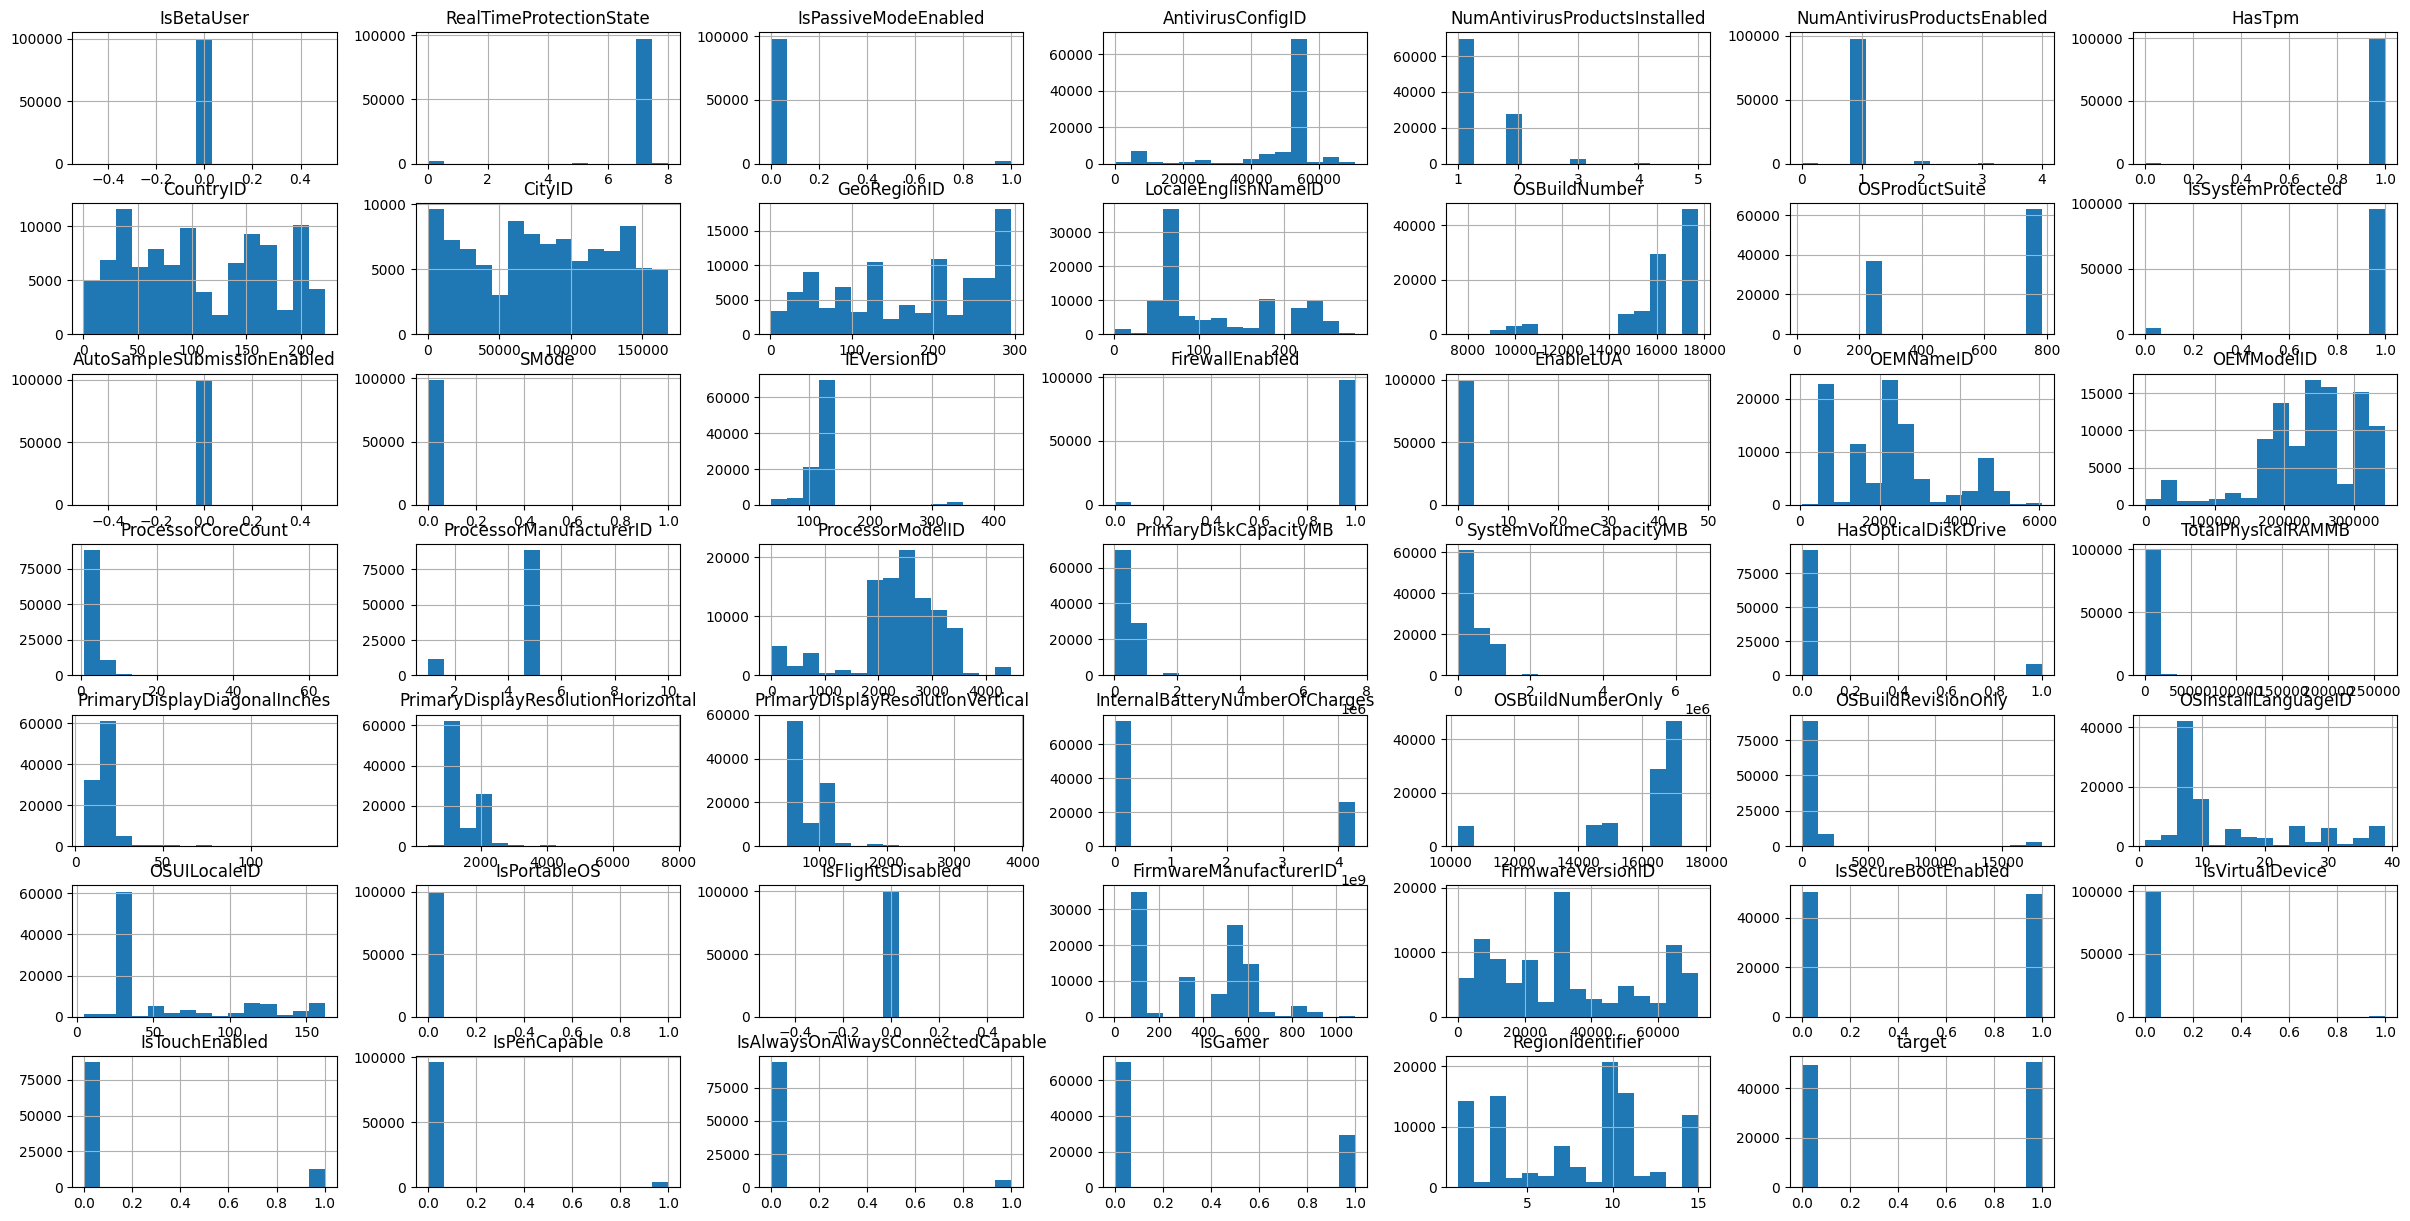

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

num_att_list = numerical_df.columns
train_df[num_att_list].hist(bins=15, figsize=(30,15))

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


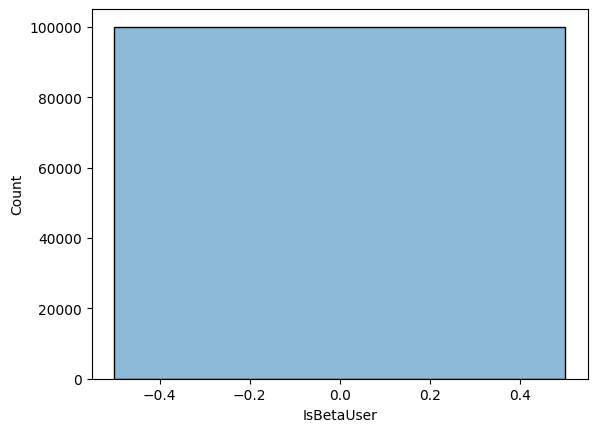

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


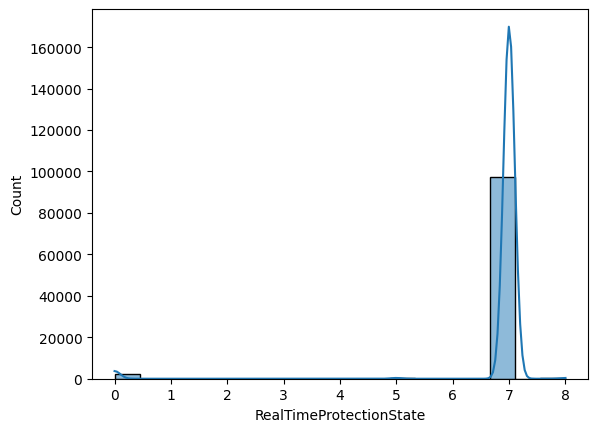

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


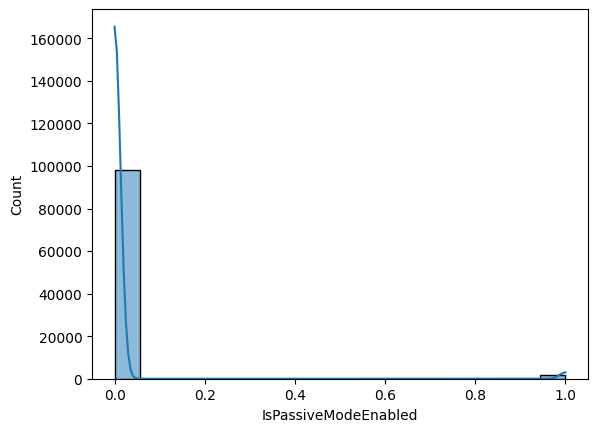

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


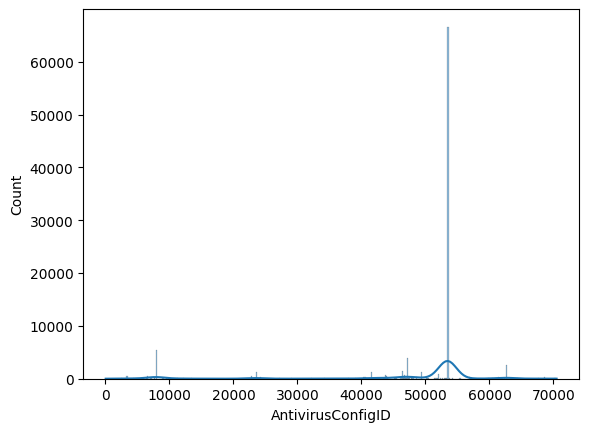

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


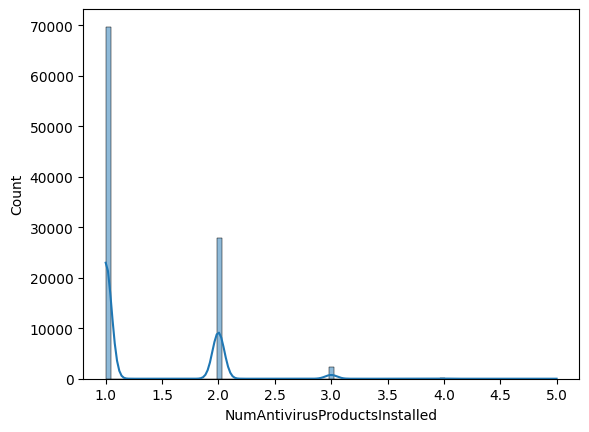

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


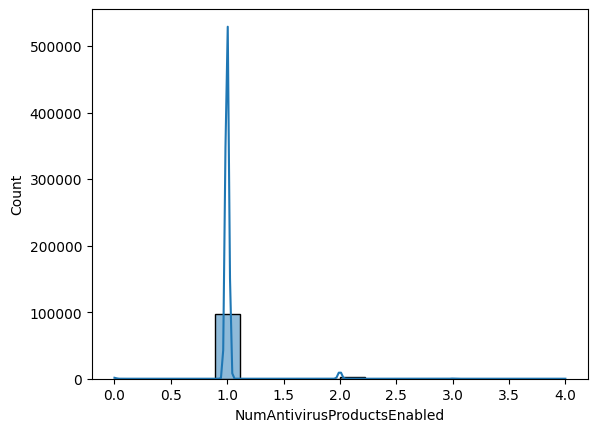

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


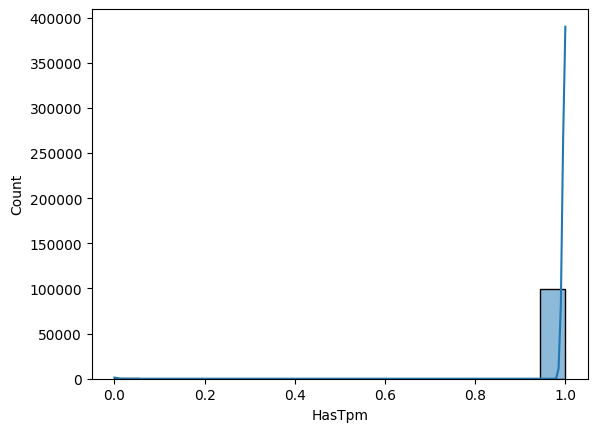

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


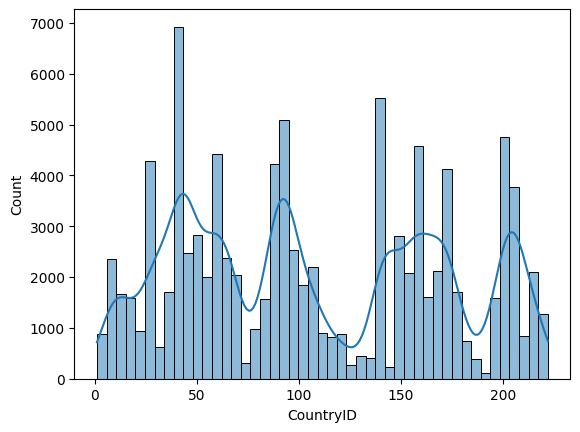

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


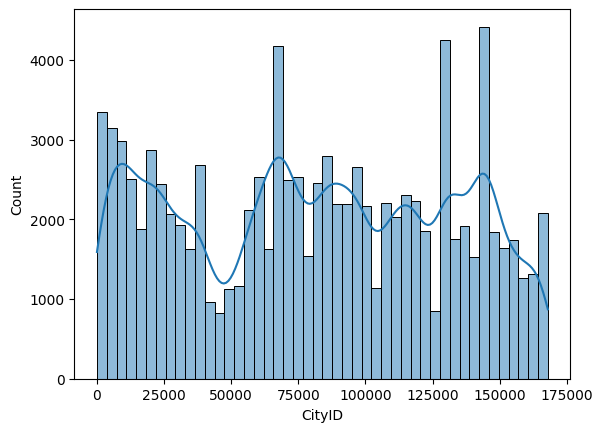

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


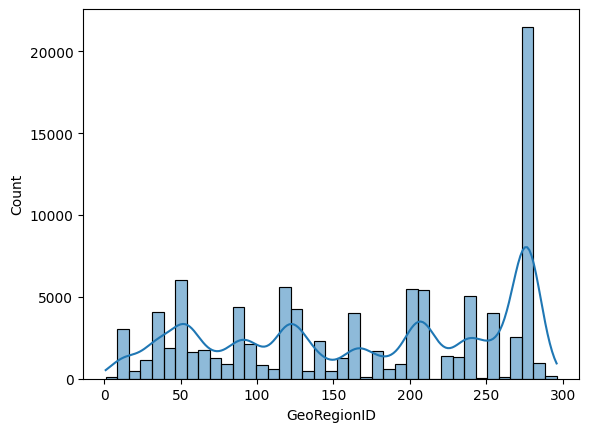

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


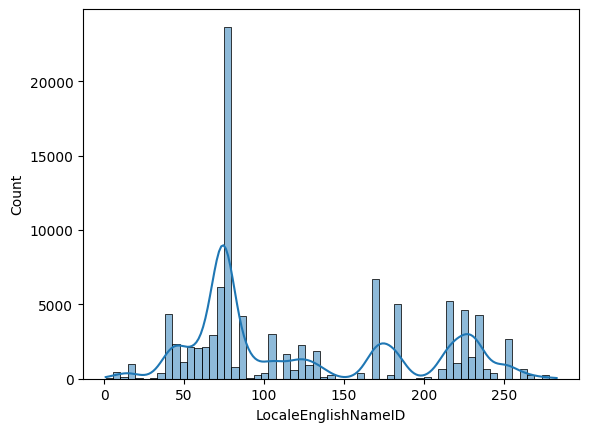

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


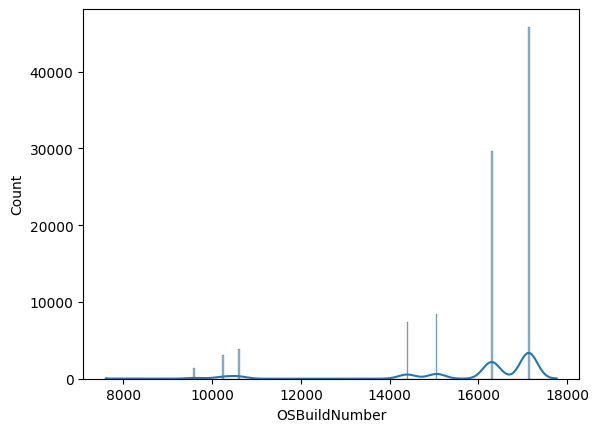

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


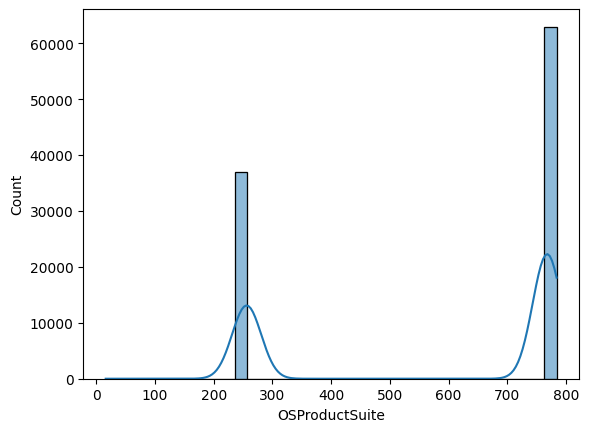

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


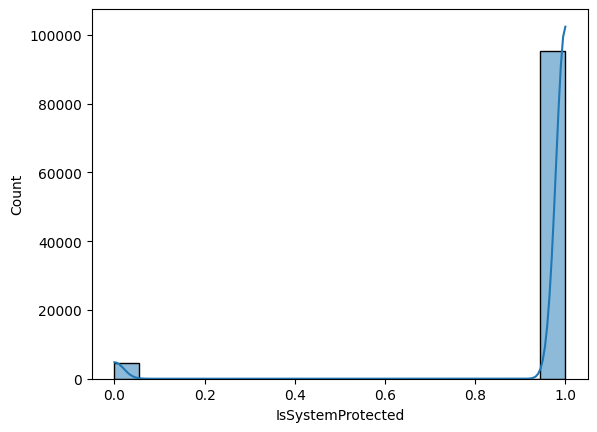

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


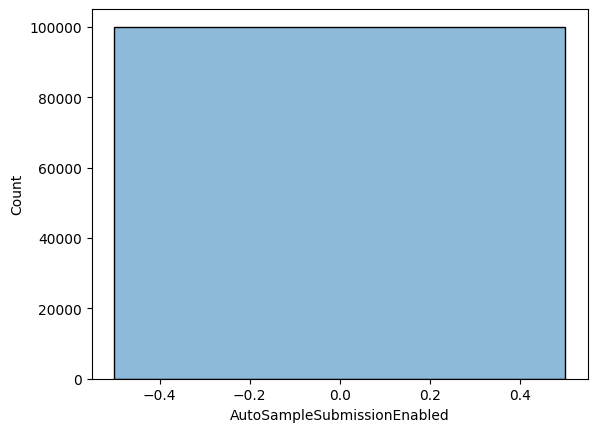

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


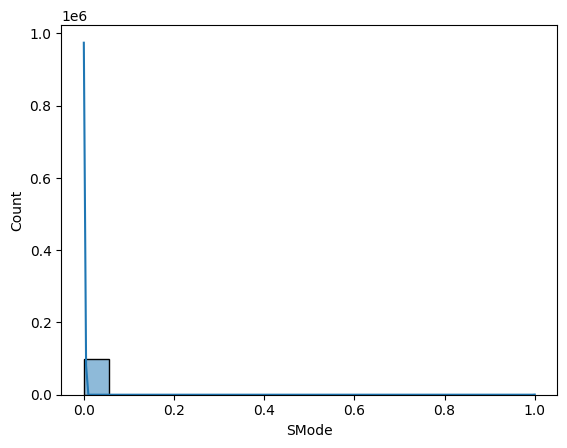

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


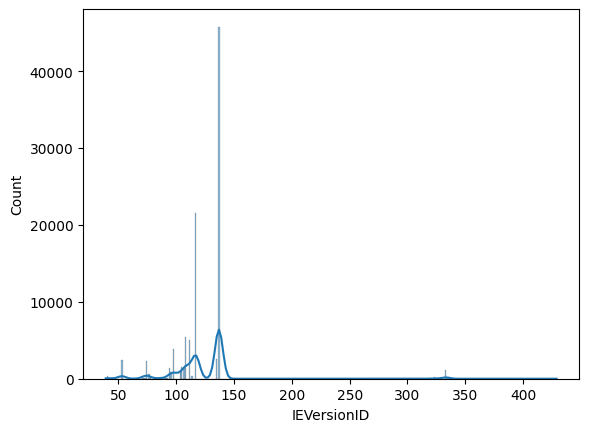

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


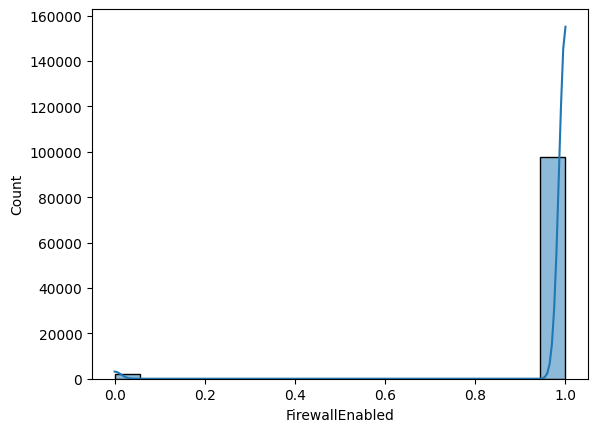

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


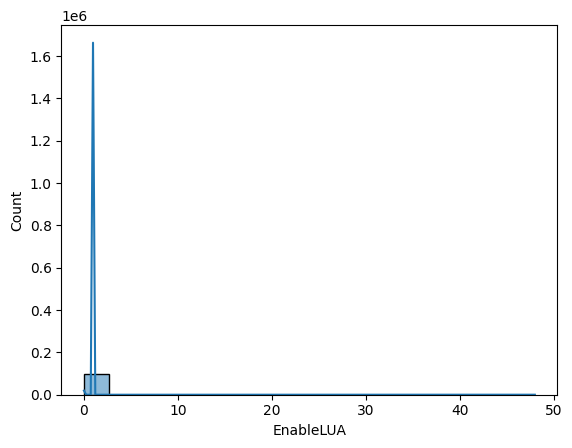

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


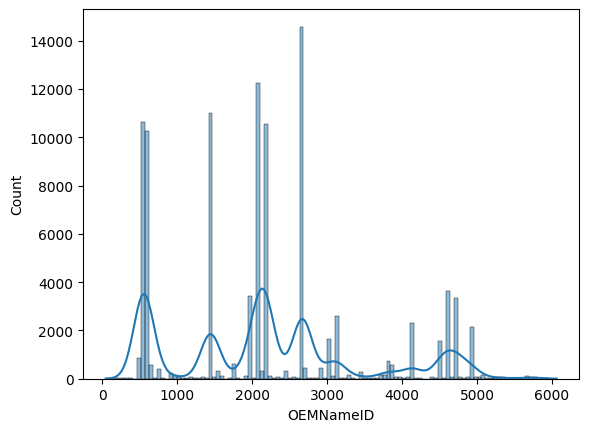

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


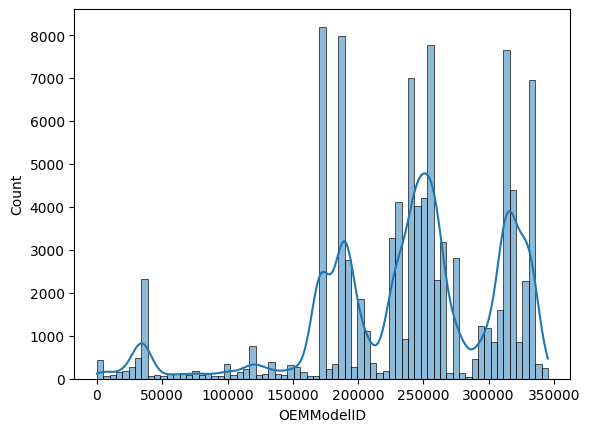

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


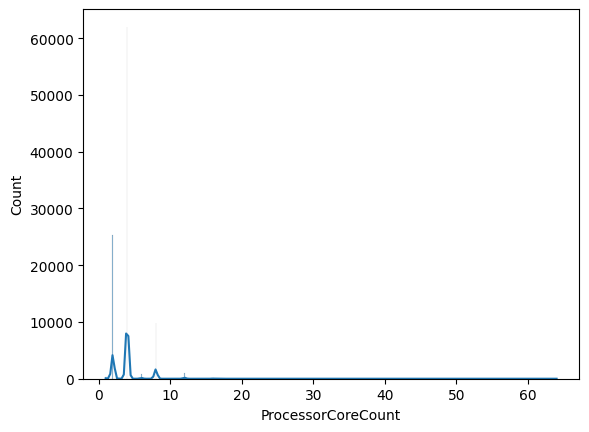

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


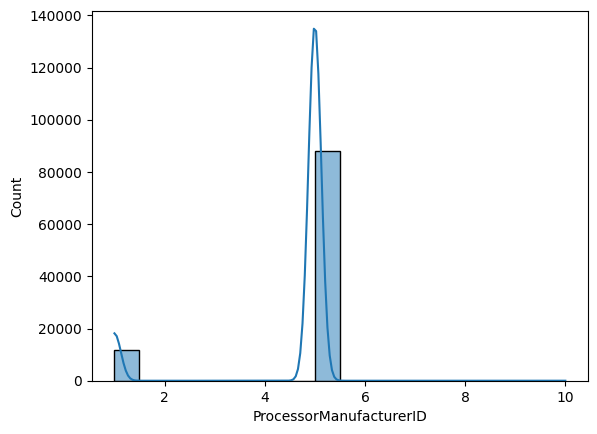

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


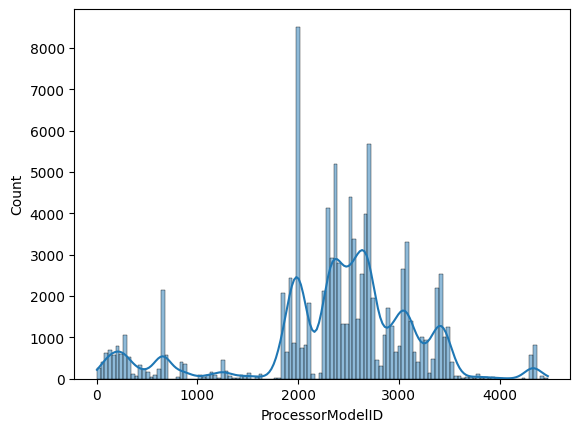

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


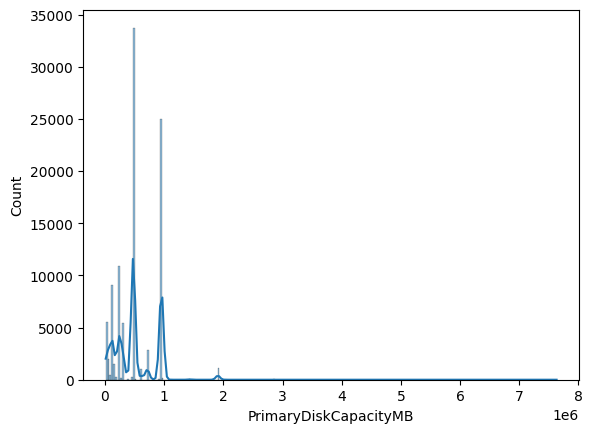

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


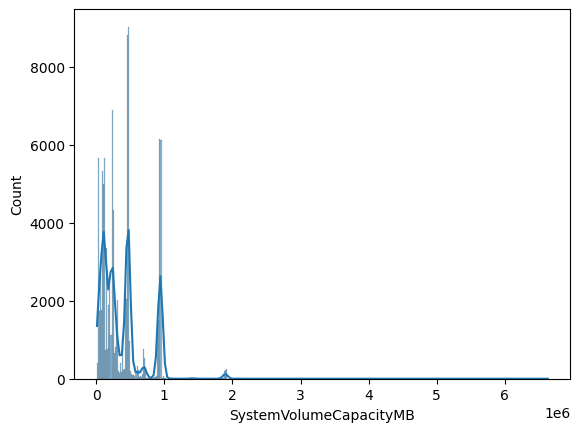

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


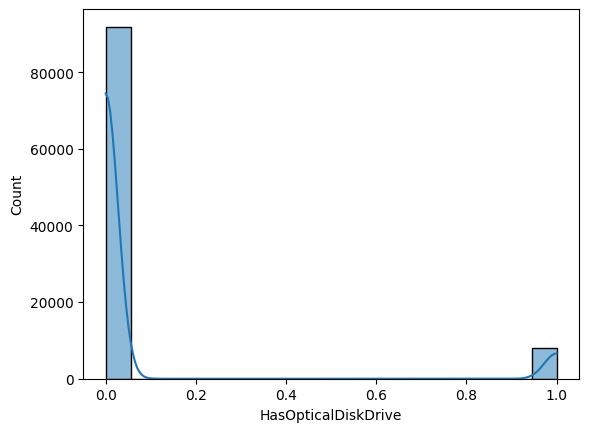

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


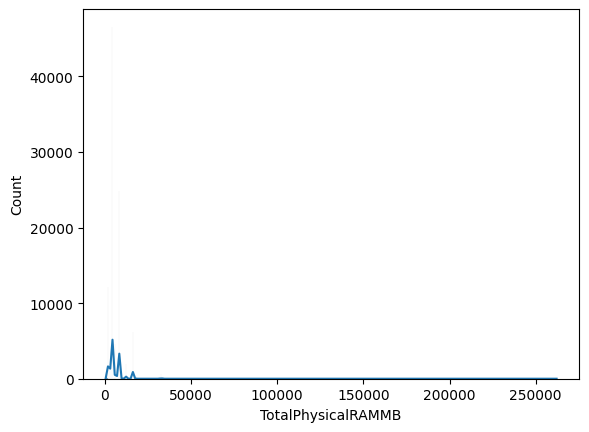

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


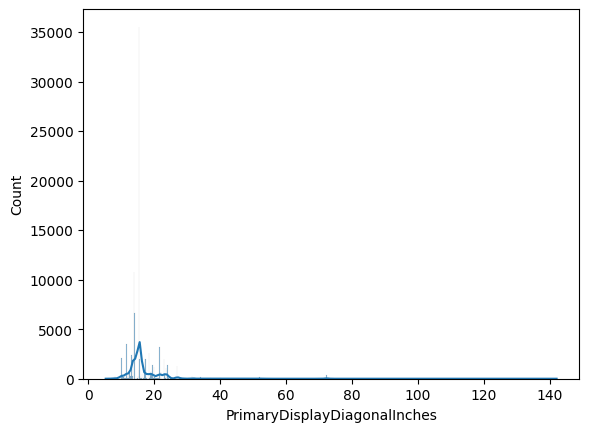

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


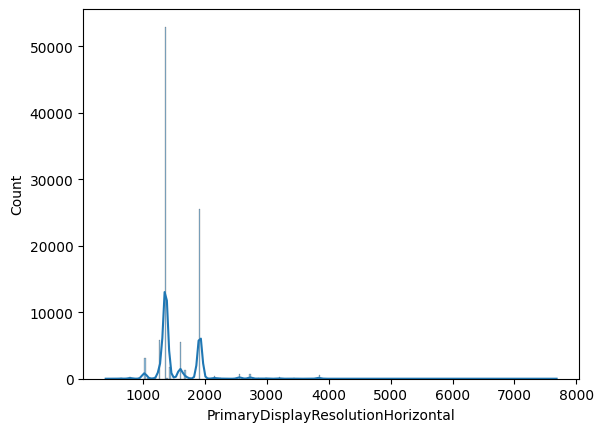

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


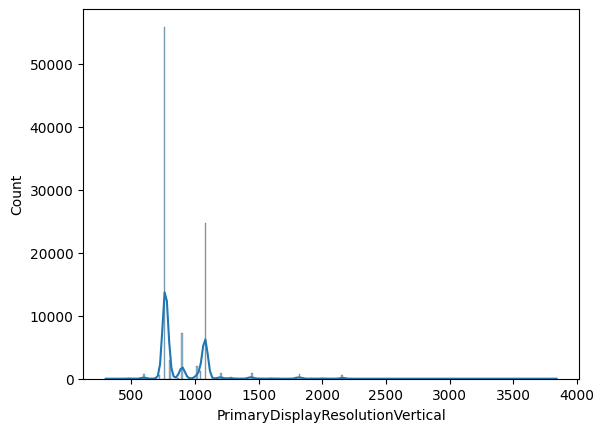

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


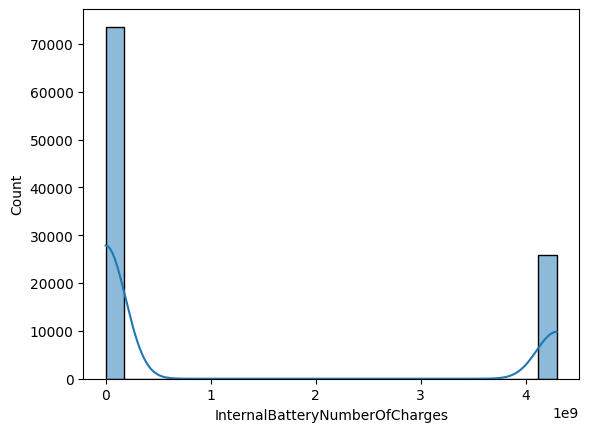

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


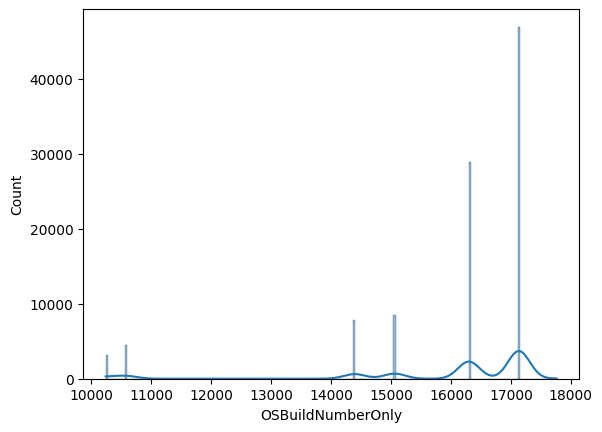

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


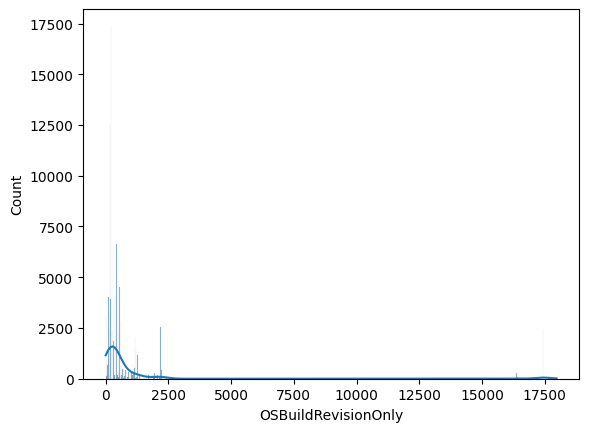

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


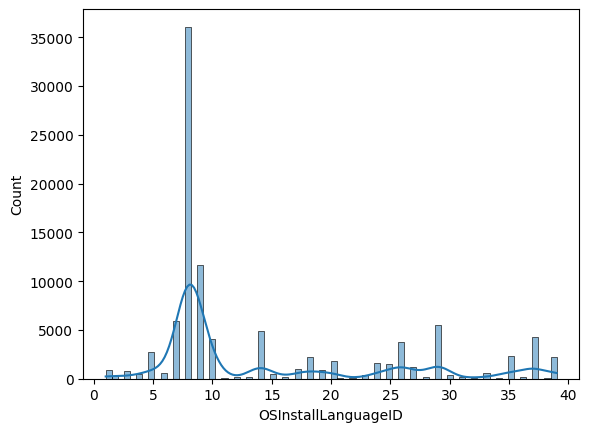

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


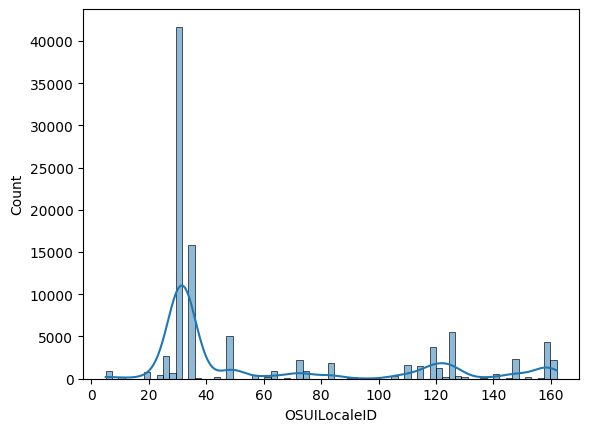

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


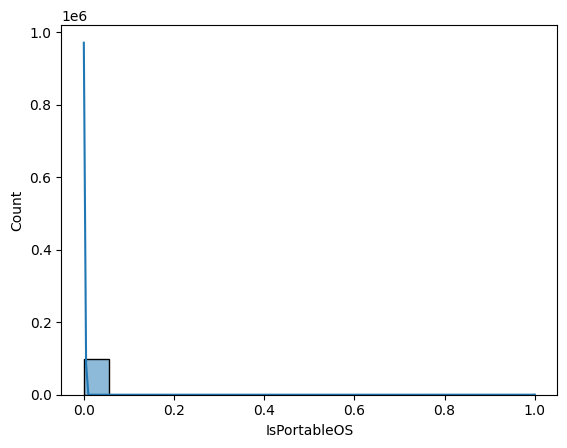

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


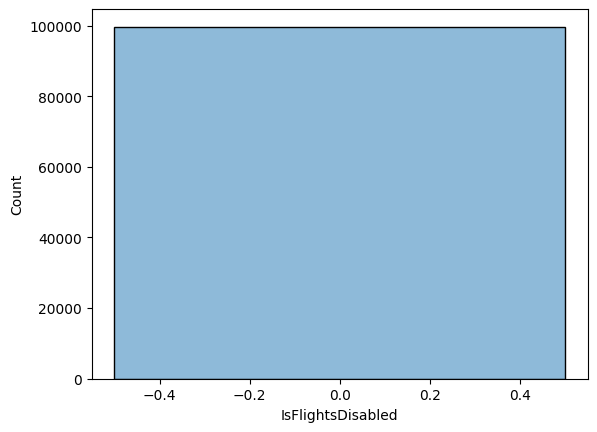

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


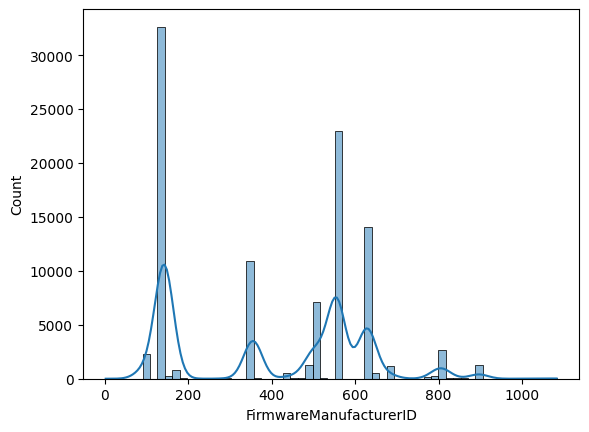

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


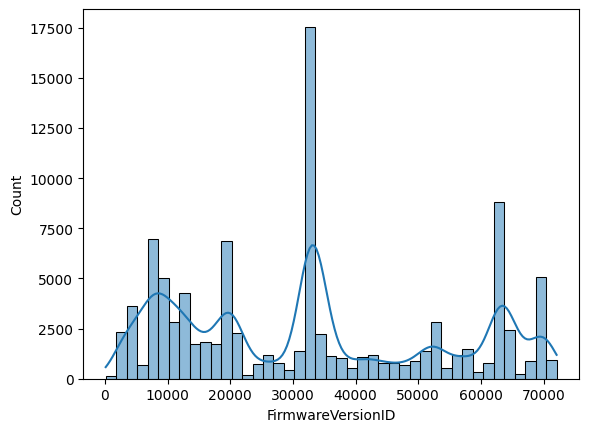

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


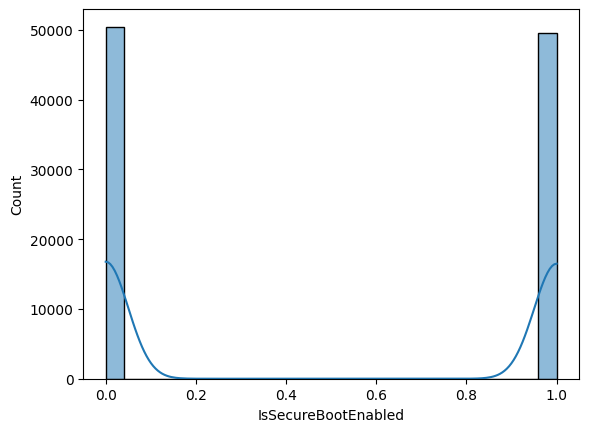

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


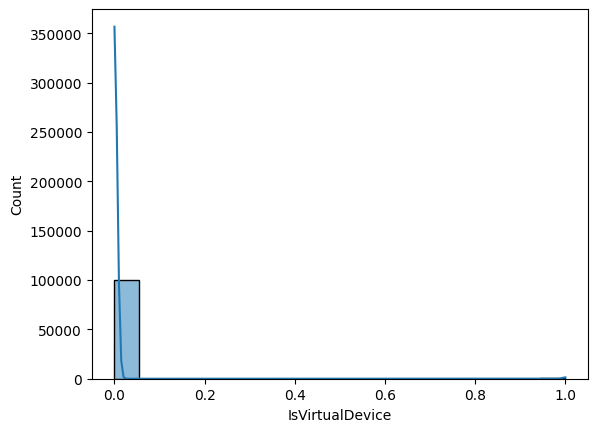

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


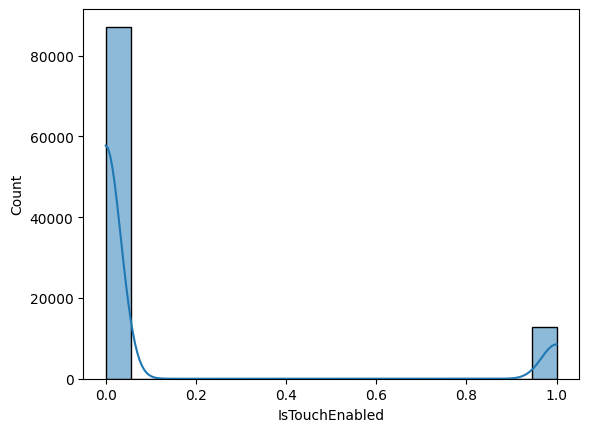

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


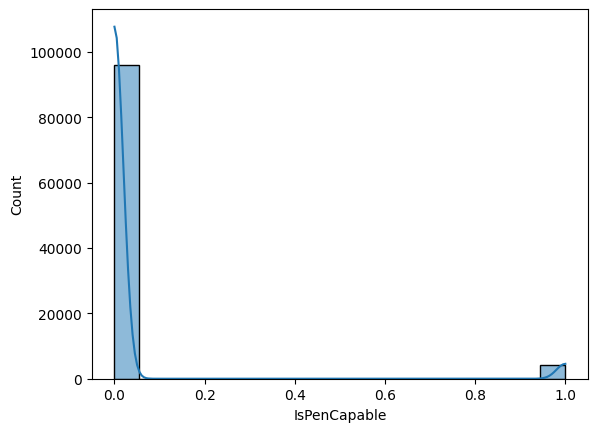

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


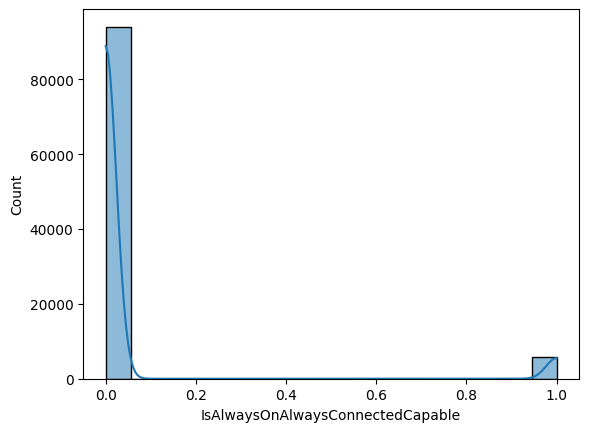

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


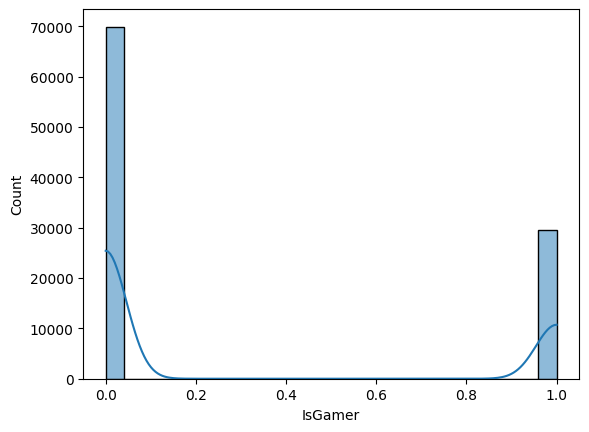

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


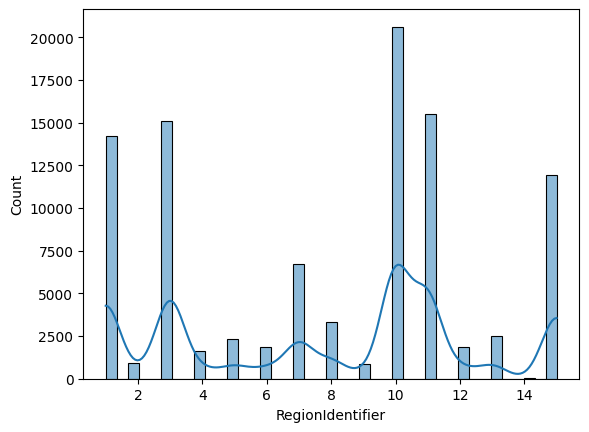

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


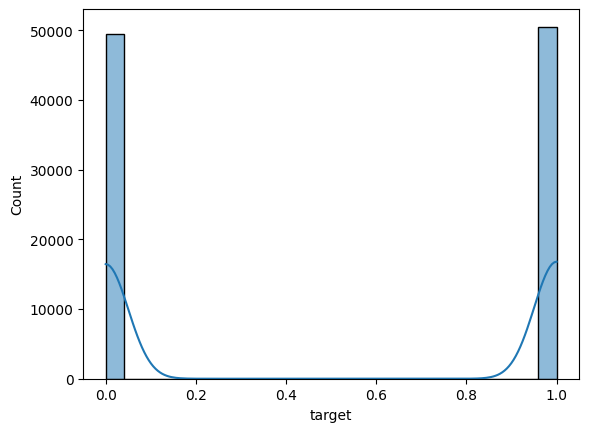

In [68]:
#for col in numerical_df:
    #sns.histplot(train_df[col], kde=True)
    #plt.show()

as we can see, some features only have one value, so they wont have any affect on predicting the data as they are same for all the cases

### Categorical Data

In [5]:
categorical_df = train_df.select_dtypes(include=['object'])
categorical_df.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,PlatformType,Processor,OSVersion,OsPlatformSubRelease,OSBuildLab,...,OSBranch,OSEdition,OSSkuFriendlyName,OSInstallType,AutoUpdateOptionsName,OSGenuineState,LicenseActivationChannel,FlightRing,DateAS,DateOS
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,windows10,x86,10.0.0.0,rs1,14393.2214.x86fre.rs1_release_1.180402-1758,...,rs1_release,Core,CORE,Update,UNKNOWN,IS_GENUINE,Retail,Retail,2018-09-10 10:11:00,2018-04-17
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,...,rs4_release,Professional,PROFESSIONAL,UUPUpgrade,FullAuto,IS_GENUINE,OEM:DM,Retail,2018-08-16 00:01:00,2018-08-14
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,...,rs4_release,Core,CORE,Reset,FullAuto,IS_GENUINE,OEM:NONSLP,Retail,2018-09-20 23:20:00,2018-09-11
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,windows10,x64,10.0.0.0,rs2,15063.0.amd64fre.rs2_release.170317-1834,...,rs2_release,Core,CORE,Upgrade,UNKNOWN,IS_GENUINE,OEM:DM,Retail,2018-09-14 00:32:00,2018-01-03
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,windows10,x86,10.0.0.0,rs4,17134.1.x86fre.rs4_release.180410-1804,...,rs4_release,Professional,PROFESSIONAL,UUPUpgrade,FullAuto,IS_GENUINE,Retail,Retail,2018-09-15 19:34:00,2018-09-11


In [70]:
cat_att_list = categorical_df.columns
print(train_df[cat_att_list].nunique())

MachineID                   99835
ProductName                     2
EngineVersion                  37
AppVersion                     69
SignatureVersion             2735
PlatformType                    4
Processor                       3
OSVersion                       7
OsPlatformSubRelease            9
OSBuildLab                    281
SKUEditionName                  8
MDC2FormFactor                 11
DeviceFamily                    2
PrimaryDiskType                 4
ChassisType                    28
PowerPlatformRole               9
NumericOSVersion              221
OSArchitecture                  3
OSBranch                       13
OSEdition                      20
OSSkuFriendlyName              18
OSInstallType                   9
AutoUpdateOptionsName           6
OSGenuineState                  4
LicenseActivationChannel        6
FlightRing                      7
DateAS                       2695
DateOS                        112
dtype: int64


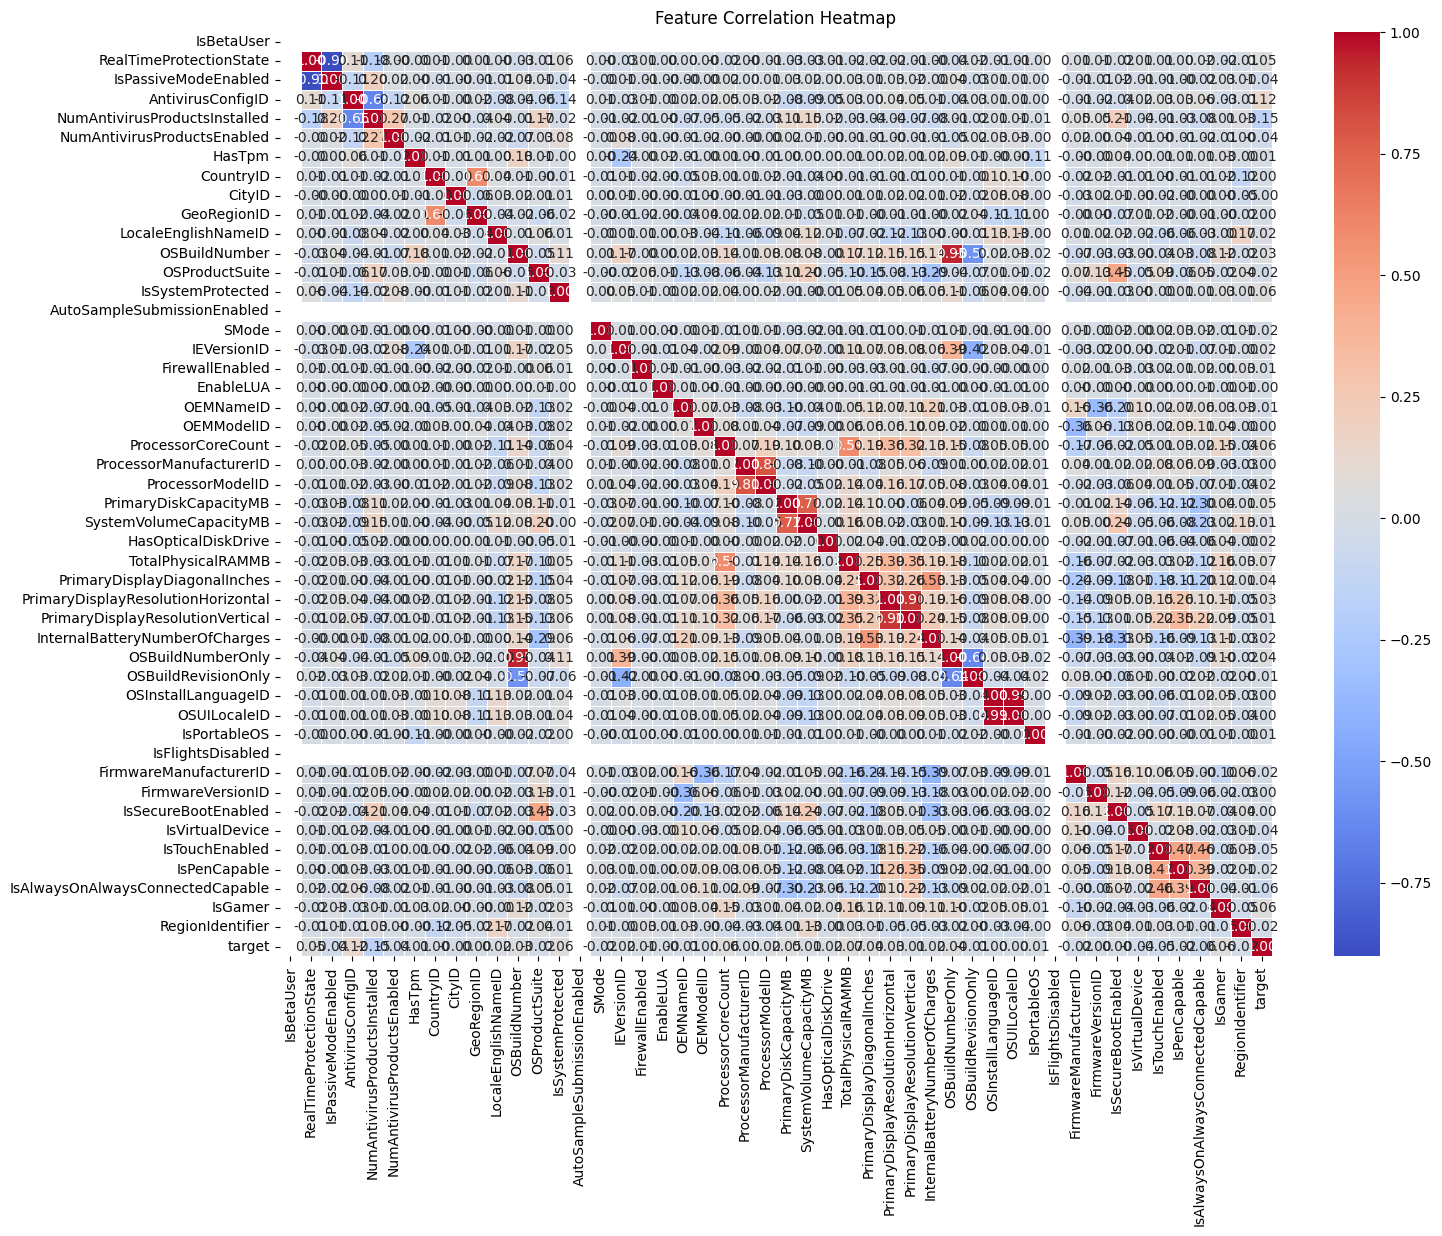

In [71]:
corr_matrix = numerical_df.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [72]:
corr_threshold = 0.85
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > corr_threshold)]
print("Features to drop:", to_drop)

Features to drop: ['PrimaryDisplayResolutionVertical', 'OSBuildNumberOnly', 'OSUILocaleID']


These features have high correlation so they are representing almost the same info, drop them

In [73]:
train_df.drop(columns=to_drop, inplace=True)
test_df.drop(columns=to_drop, inplace=True)

In [74]:
unique_counts = train_df.nunique()
single_value_cols = unique_counts[unique_counts == 1].index
single_value_cols

Index(['IsBetaUser', 'AutoSampleSubmissionEnabled', 'IsFlightsDisabled'], dtype='object')

these have only a single value so they can be dropped

In [75]:
train_df.drop(columns=single_value_cols, inplace=True)
test_df.drop(columns=single_value_cols, inplace=True)

In [6]:
train_df.duplicated().sum()

165

In [7]:
train_df= train_df.drop_duplicates()
train_df.duplicated().sum()

0

So from the EDA, we concluded that some features were unnecessary to be included in model training... so we removed those features (features with high corr, features with single value)

other insights we gained from the eda are used in preprocessing the data before model training. Like:
- presence of null cols (need for imputation)
- presence of categorical cols (need for encoding)
- presence of different numerical cols (need for scaling)
- presence of redundant features like duplicate rows, high corr features, single value cols (removed above^)

# Preprocessing

In [8]:
from sklearn.model_selection import train_test_split

X = train_df.drop('target', axis=1)
y = train_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(train_df.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(99835, 76)
(79868, 75) (79868,)
(19967, 75) (19967,)


In [9]:
num_cols = X_train.select_dtypes(include=['int64','float64']).columns
num_cols

Index(['IsBetaUser', 'RealTimeProtectionState', 'IsPassiveModeEnabled',
       'AntivirusConfigID', 'NumAntivirusProductsInstalled',
       'NumAntivirusProductsEnabled', 'HasTpm', 'CountryID', 'CityID',
       'GeoRegionID', 'LocaleEnglishNameID', 'OSBuildNumber', 'OSProductSuite',
       'IsSystemProtected', 'AutoSampleSubmissionEnabled', 'SMode',
       'IEVersionID', 'FirewallEnabled', 'EnableLUA', 'OEMNameID',
       'OEMModelID', 'ProcessorCoreCount', 'ProcessorManufacturerID',
       'ProcessorModelID', 'PrimaryDiskCapacityMB', 'SystemVolumeCapacityMB',
       'HasOpticalDiskDrive', 'TotalPhysicalRAMMB',
       'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal',
       'PrimaryDisplayResolutionVertical', 'InternalBatteryNumberOfCharges',
       'OSBuildNumberOnly', 'OSBuildRevisionOnly', 'OSInstallLanguageID',
       'OSUILocaleID', 'IsPortableOS', 'IsFlightsDisabled',
       'FirmwareManufacturerID', 'FirmwareVersionID', 'IsSecureBootEnabled',
       'IsVirtua

In [10]:
cat_cols = X_train.select_dtypes(include="object").columns
cat_cols

Index(['MachineID', 'ProductName', 'EngineVersion', 'AppVersion',
       'SignatureVersion', 'PlatformType', 'Processor', 'OSVersion',
       'OsPlatformSubRelease', 'OSBuildLab', 'SKUEditionName',
       'MDC2FormFactor', 'DeviceFamily', 'PrimaryDiskType', 'ChassisType',
       'PowerPlatformRole', 'NumericOSVersion', 'OSArchitecture', 'OSBranch',
       'OSEdition', 'OSSkuFriendlyName', 'OSInstallType',
       'AutoUpdateOptionsName', 'OSGenuineState', 'LicenseActivationChannel',
       'FlightRing', 'DateAS', 'DateOS'],
      dtype='object')

In [11]:
threshold = 5

oh_cols = [i for i in cat_cols if len(X_train[i].unique()) <= threshold]
oh_cols

['ProductName',
 'PlatformType',
 'Processor',
 'DeviceFamily',
 'PrimaryDiskType',
 'OSArchitecture',
 'OSGenuineState']

In [12]:
ord_cols = [i for i in cat_cols if i not in oh_cols]
ord_cols

['MachineID',
 'EngineVersion',
 'AppVersion',
 'SignatureVersion',
 'OSVersion',
 'OsPlatformSubRelease',
 'OSBuildLab',
 'SKUEditionName',
 'MDC2FormFactor',
 'ChassisType',
 'PowerPlatformRole',
 'NumericOSVersion',
 'OSBranch',
 'OSEdition',
 'OSSkuFriendlyName',
 'OSInstallType',
 'AutoUpdateOptionsName',
 'LicenseActivationChannel',
 'FlightRing',
 'DateAS',
 'DateOS']

In [13]:
date_cols= ['DateAS','DateOS']
ord_cols= [x for x in ord_cols if x not in date_cols]

print(ord_cols)
print(date_cols)

['MachineID', 'EngineVersion', 'AppVersion', 'SignatureVersion', 'OSVersion', 'OsPlatformSubRelease', 'OSBuildLab', 'SKUEditionName', 'MDC2FormFactor', 'ChassisType', 'PowerPlatformRole', 'NumericOSVersion', 'OSBranch', 'OSEdition', 'OSSkuFriendlyName', 'OSInstallType', 'AutoUpdateOptionsName', 'LicenseActivationChannel', 'FlightRing']
['DateAS', 'DateOS']


In [14]:
from sklearn.base import BaseEstimator, TransformerMixin

class DateTimeFeaturesTransformer(BaseEstimator, TransformerMixin):
  """
  Custom transformer for extracting integer features (year, month, day, hour, minute, second)
  from datetime strings in the format 'DD-MM-YYYY HH:MM:SS'. Handles both DataFrame and Series inputs.
  """

  def __init__(self, date_format='%Y-%m-%d %H:%M:%S'):
    """
    Args:
      date_format: The format string used to parse the datetime strings. Defaults to '%d-%m-%Y %H:%M:%S'.
    """
    self.date_format = date_format

  def fit(self, X, y=None):
    """
    This method is required for scikit-learn pipelines but does nothing in this case.
    """
    return self

  def transform(self, X):
    """
    Transforms the input data by extracting integer features from datetime strings.

    Args:
      X: The input data, can be a pandas DataFrame or Series.

    Returns:
      A NumPy array containing the extracted integer features (year, month, day, hour, minute, second).
    """

    # Convert to pandas Series if DataFrame is passed
    if isinstance(X, pd.DataFrame):
      X = X.iloc[:, 0]

    # Convert to datetime
    datetimes = pd.to_datetime(X, format=self.date_format)

    # Extract features
    year = datetimes.dt.year.astype(int)
    month = datetimes.dt.month.astype(int)
    day = datetimes.dt.day.astype(int)
    hour = datetimes.dt.hour.astype(int)
    minute = datetimes.dt.minute.astype(int)
    second = datetimes.dt.second.astype(int)

    # Combine features into a NumPy array
    features = np.column_stack([year, month, day, hour, minute, second])

    return features

### Pipeline

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

preprocessing_pipe = ColumnTransformer(
    transformers=[
        
        # Pipeline for ordinal columns: imputing most frequent and ordinal encoding
        ('ord_pipeline', Pipeline([
            ('impute_most_frequent', SimpleImputer(strategy='most_frequent')),
            ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
        ]), ord_cols),
        
        # Pipeline for 'onehot columns: imputing most frequent and one-hot encoding
        ('oh_pipeline', Pipeline([
            ('impute_most_frequent', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))
        ]), oh_cols),

        # Pipeline for numerical columns: imputing most frequent and one-hot encoding
        ('num_pipeline', Pipeline([
            ('impute_most_frequent', SimpleImputer(strategy='most_frequent')),
            ('stdScl', StandardScaler())
        ]), num_cols),
        
        # Handle date
        ('date_transformer', DateTimeFeaturesTransformer(), date_cols)
    ]
)

# Modelling

In [16]:
#imports

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

## Model 0: Dummy Classifier

In [17]:
model = DummyClassifier().fit(X,y)
y_pred = model.predict(X)

In [18]:
from sklearn.metrics import accuracy_score

accuracy_score(y,y_pred)

0.5052636850803827

## Model 1: Logistic Regression

In [30]:
#model_pipe_lr = Pipeline([
#    ('preprocess', preprocessing_pipe),
#    ('lr_model', LogisticRegression(random_state=42, solver='liblinear', max_iter=2000))
#])

In [31]:
#lr_model = model_pipe_lr.fit(X_train, y_train)
#lr_y_pred = lr_model.predict(X_test)

In [32]:
#accuracy_score(y_test,lr_y_pred)
# 0.59505

In [33]:
#sumbit_to_competition(lr_model)

#### Hyperparameter Tuning

In [34]:
#model_pipe_logistic = Pipeline([
#    ('preprocess', preprocessing_pipe),
#    ('logistic_model', LogisticRegressionCV(
#        Cs=[0.01, 0.1, 1, 10, 100],
#        cv=5,                       
#        penalty='l2',
#        scoring='f1_macro',
#        max_iter=2000,
#        random_state=42 
#    ))
#])

In [35]:
#lr_cv_model = model_pipe_logistic.fit(X_train, y_train)
#lr_cv_y_pred = lr_cv_model.predict(X_test)

In [36]:
#accuracy_score(y_test,lr_cv_y_pred)
# 0.57325

## Model 2: KNN

In [37]:
#knn_model_pipe = Pipeline([
#    ('preprocess', preprocessing_pipe),
#    ('knn_model', KNeighborsClassifier())
#])

In [38]:
#knn_model = knn_model_pipe.fit(X_train, y_train)
#knn_y_pred = knn_model.predict(X_test)

In [39]:
#accuracy_score(y_test,knn_y_pred)
# 0.5165

#### Hyperparameter Tuning

In [40]:
#param_grid = {
#    'knn_model__n_neighbors': [3, 5, 7, 9, 11],  
#    'knn_model__weights': ['uniform', 'distance'],
#    'knn_model__metric': ['euclidean', 'manhattan', 'minkowski']
#}

#grid_search = GridSearchCV(gridcv_knn_model_pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [41]:
#gridcv_knn_model = gridcv_knn_model_pipe.fit(X_train, y_train)
#gridcv_knn_y_pred = gridcv_knn_model.predict(X_test)

In [42]:
#accuracy_score(y_test,gridcv_knn_y_pred)
# 0.5165

## Model 3: RandomForestClassifier

In [43]:
#rf_model_pipe = Pipeline([
#    ('preprocess', preprocessing_pipe),
#    ('rf_model', RandomForestClassifier())
#])

In [44]:
#rf_model = rf_model_pipe.fit(X_train, y_train)
#rf_y_pred = rf_model.predict(X_test)

In [45]:
#accuracy_score(y_test,rf_y_pred)
# 0.61325

In [46]:
#sumbit_to_competition(rf_model)

#### Hyperparameter Tuning (RandomizedSearchCV)

In [47]:
#randomcv_model_pipe = Pipeline([
#    ('preprocess', preprocessing_pipe),  # Assuming this is your preprocessing pipeline
#    ('rf_model', RandomForestClassifier(class_weight='balanced', random_state=42))
#])

#param_dist = {
#    'rf_model__n_estimators': [100, 200, 300, 400, 500],  # Number of trees
#    'rf_model__max_depth': [10, 20, 30, None],  # Tree depth
#    'rf_model__min_samples_split': [2, 5, 10],  # Minimum samples per split
#    'rf_model__min_samples_leaf': [1, 2, 4],  # Minimum samples per leaf
#    'rf_model__max_features': ['sqrt', 'log2', None]  # Max features
#}

In [48]:
#random_search = RandomizedSearchCV(
#    randomcv_model_pipe, 
#    param_distributions=param_dist, 
#    n_iter=20,  # Number of random combinations to try
#    cv=5,  # 5-fold cross-validation
#    scoring='accuracy', 
#    n_jobs=-1,  # Use all CPU cores
#    random_state=42
#)

In [49]:
#randomcv_rf_model = randomcv_model_pipe.fit(X_train, y_train)
#randomcv_rf_y_pred = randomcv_rf_model.predict(X_test)

In [50]:
#accuracy_score(y_test,randomcv_rf_y_pred)
# 0.6109

## Model 4: HistGradientBoostingClassifier

In [19]:
hgbc_model_pipe = Pipeline([
    ('preprocess', preprocessing_pipe),
    ('hgbc_model', HistGradientBoostingClassifier(class_weight='balanced'))
])

In [29]:
hgbc_model = hgbc_model_pipe.fit(X_train, y_train)
hgbc_y_pred = hgbc_model.predict(X_test)

In [30]:
accuracy_score(y_test,hgbc_y_pred)
# 0.6249

0.6249812190113687

In [92]:
sumbit_to_competition(hgbc_model)

   id  target
0   0       1
1   1       0
2   2       1
3   3       0
4   4       0


#### Hyperparameter Tuning (GridsSarchCV)

In [24]:
#param_grid = {
#    'hgbc_model__max_depth': [5, 10],  
#    'hgbc_model__min_samples_leaf': [5, 10],  
#    'hgbc_model__learning_rate': [0.05, 0.1],  
#    'hgbc_model__max_iter': [100, 200]  
#}

#grid_search = GridSearchCV(
#    hgbc_model_pipe, 
#    param_grid, 
#    cv=5,  
#   scoring='accuracy', 
#    n_jobs=-1,  
#    verbose=1  
#)


In [25]:
#gridcv_hgbc_model = grid_search.fit(X_train, y_train)
#gridcv_hgbc_y_pred = gridcv_hgbc_model.predict(X_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [26]:
#accuracy_score(y_test,gridcv_hgbc_y_pred)
# 0.62438

0.6243802273751691